In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Add the directory containing the VotingModel to the Python path
sys.path.append(os.path.abspath('/Users/idrees/Code/govxs/'))
from util.plot_results import plot_aggregation_results
from model.VotingModel import VotingModel
data_dir = '/Users/idrees/Code/govxs/data'
os.makedirs(data_dir, exist_ok=True)

model = VotingModel(num_voters=144, num_projects=600, total_op_tokens=30e6)
model.step()

results_df=model.compile_fund_allocations()

# Save the DataFrame to a CSV file in the data directory
results_df.to_csv(os.path.join(data_dir, 'fund_allocation_data.csv'), index=False)
print(results_df)

voting_df = pd.DataFrame(model.voting_matrix, columns=[f"Project {i+1}" for i in range(model.num_projects)])
voting_df['Voter'] = [f'Voter {i+1}' for i in range(model.num_voters)]

# Save the DataFrame to a CSV file in the data directory
voting_df.to_csv(os.path.join(data_dir, 'voting_data.csv'), index=False)
print(voting_df)

         Project  Mean Aggregation  Median Aggregation  Quadratic Aggregation
0      Project 1      54600.397252        52267.285221           59210.582624
1      Project 2      56355.791378        49307.787686           63079.005123
2      Project 3      46601.968327        49804.065242           43133.653999
3      Project 4      50904.600196        46945.780311           51466.163013
4      Project 5      56045.260813        55936.458816           62385.766964
..           ...               ...                 ...                    ...
595  Project 596      46902.349163        44550.988807           43691.496521
596  Project 597      50966.568503        46688.149281           51591.543124
597  Project 598      49569.235544        49412.068920           48801.387750
598  Project 599      49348.996988        49052.911534           48368.697182
599  Project 600      53630.200654        58018.047823           57125.047374

[600 rows x 4 columns]
         Project 1      Project 2     Pr

/Users/idrees/Code/govxs/agents/VoterAgent.py:8: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


Summary Statistics:
Mean Aggregation: Total Funds: 30000000.0, Max Funds: 66163.2857026809, Min Funds: 36993.33852756235
Median Aggregation: Total Funds: 30000000.000000004, Max Funds: 72343.39584916063, Min Funds: 33445.21498203492
Quadratic Aggregation: Total Funds: 30000000.0, Max Funds: 86922.52656854648, Min Funds: 27173.48036382555


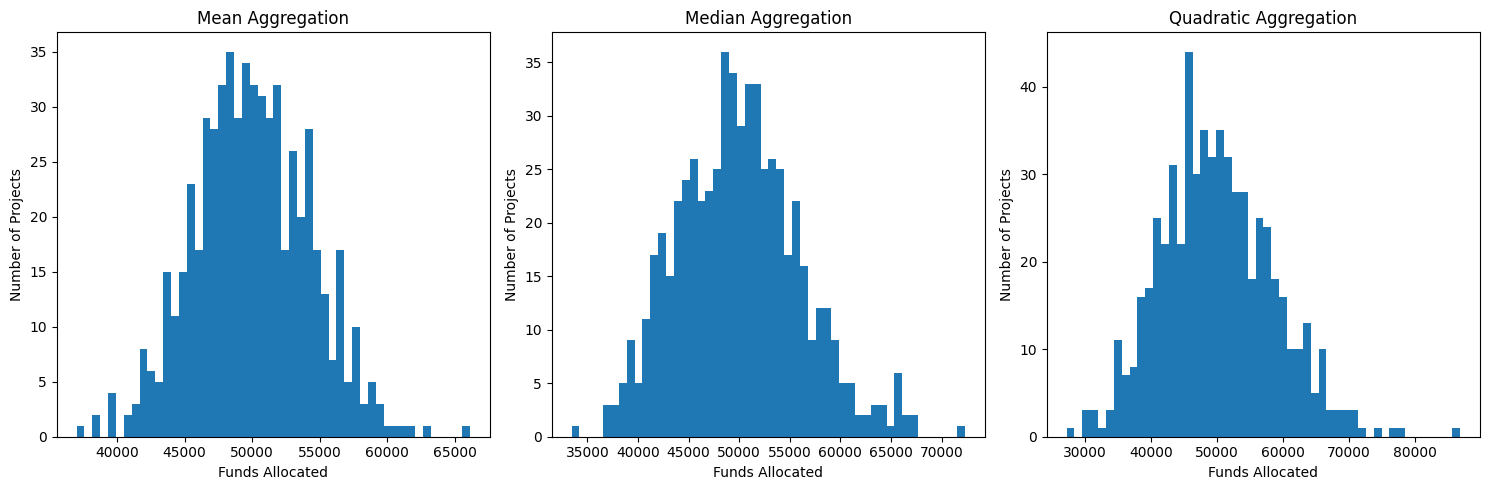

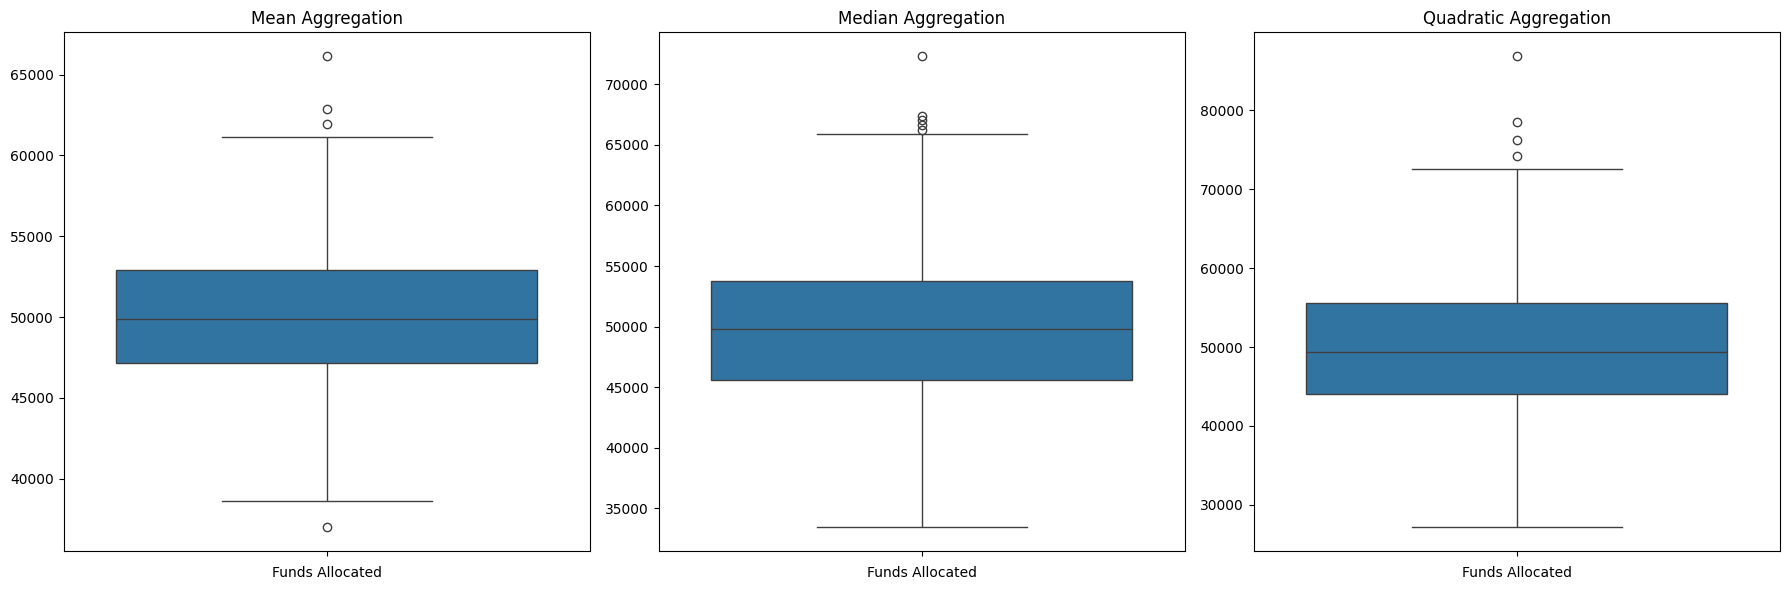

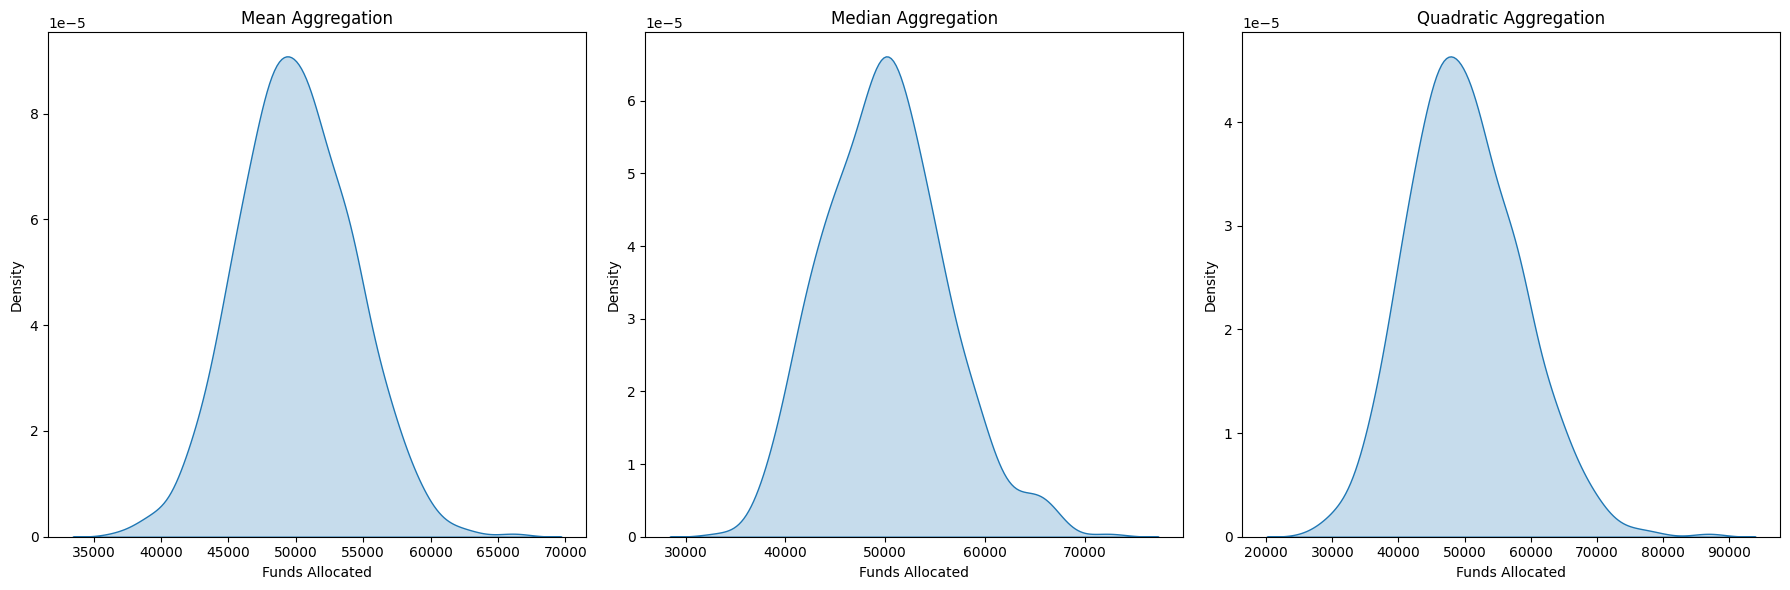

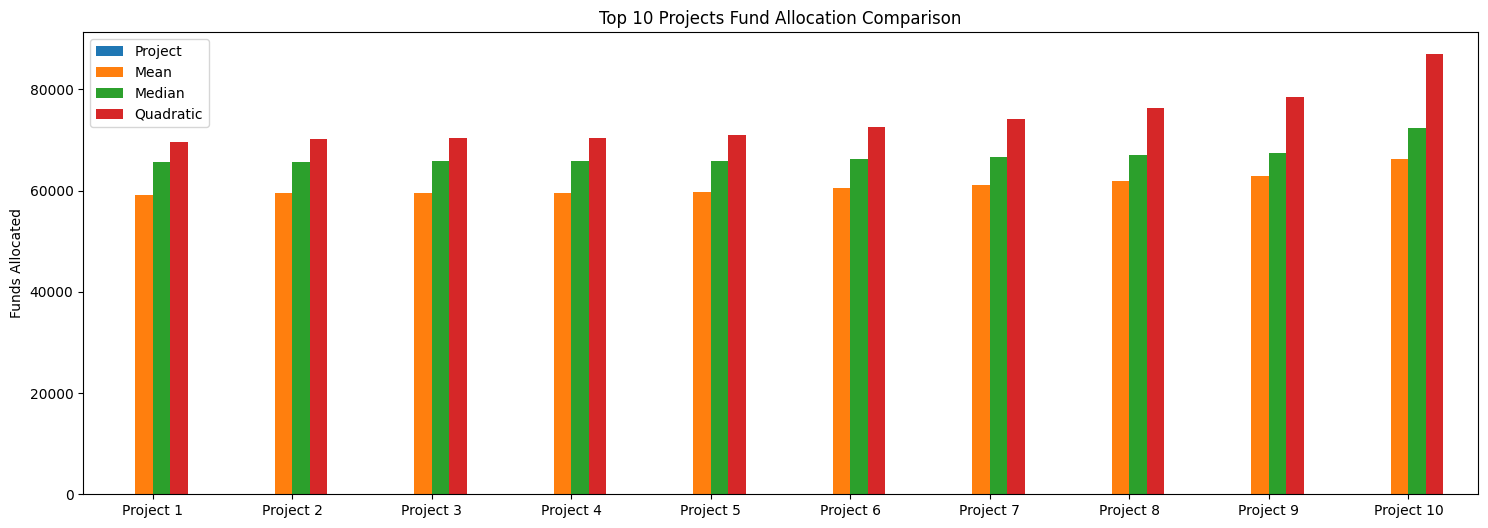

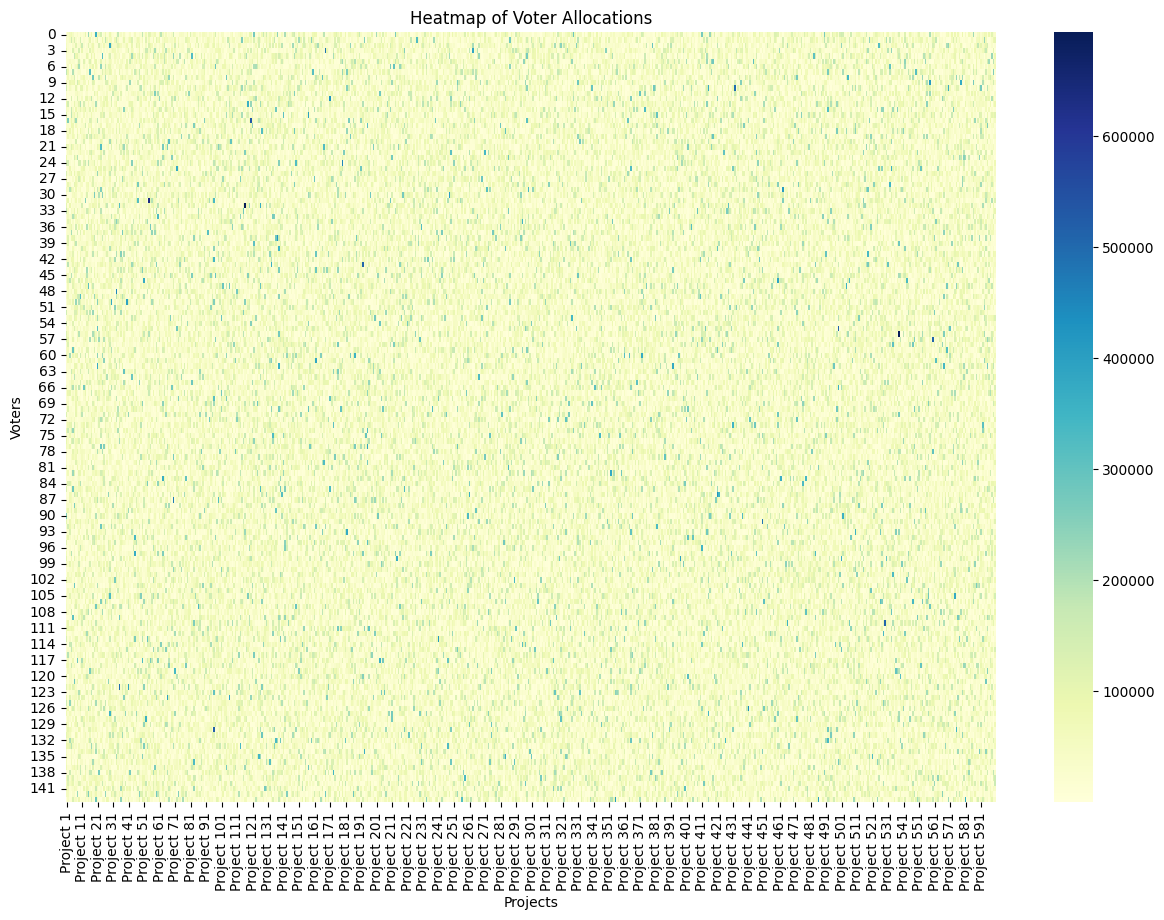

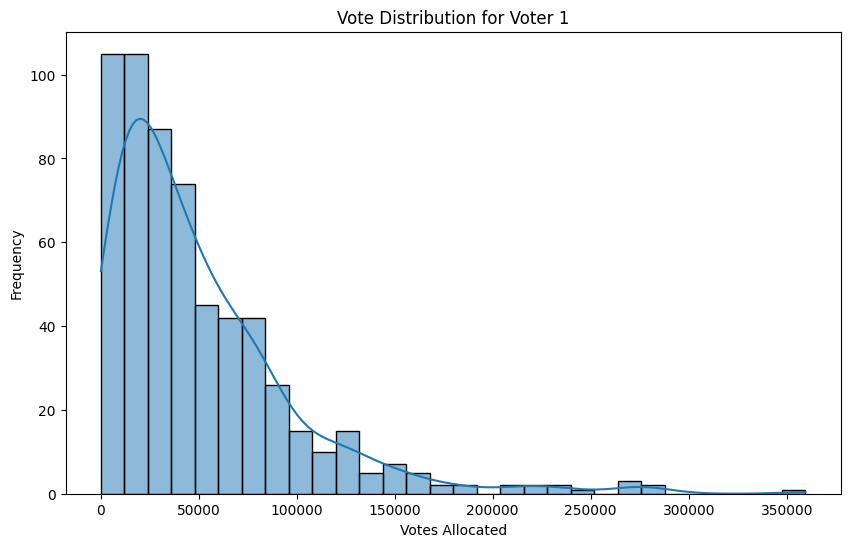

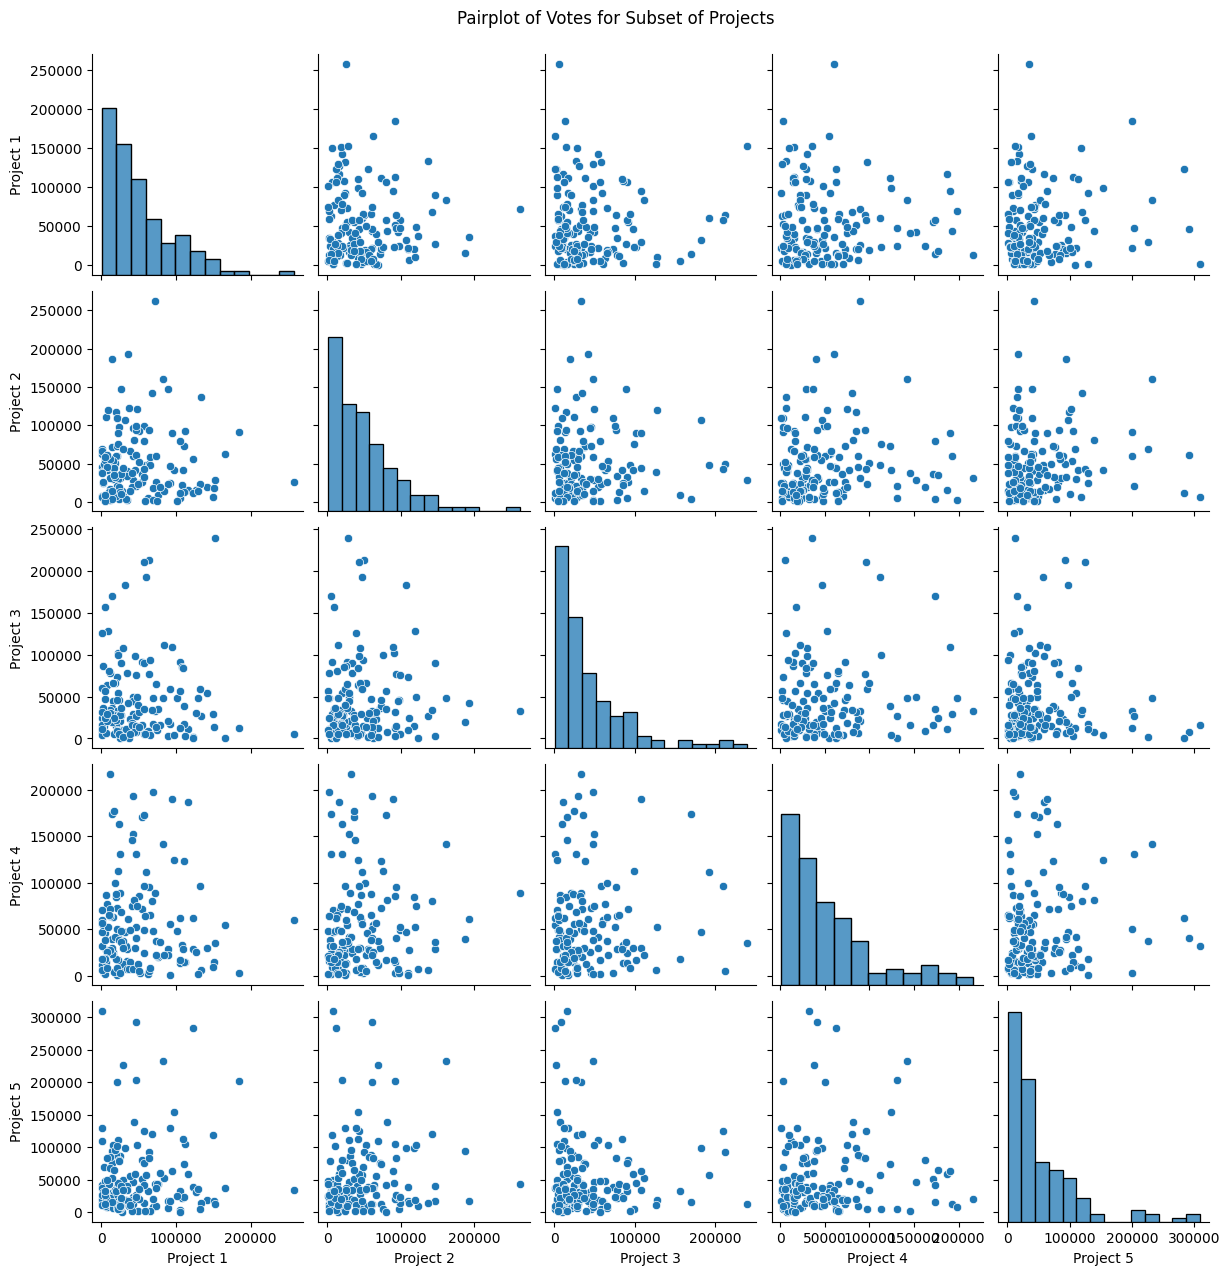

In [9]:
def plot_aggregation_results(mean_funds, median_funds, quadratic_funds, voting_matrix, num_top_projects=10):


    # Calculate summary statistics for each aggregation method
    total_mean_funds = np.sum(mean_funds)
    total_median_funds = np.sum(median_funds)
    total_quadratic_funds = np.sum(quadratic_funds)

    max_mean_funds = np.max(mean_funds)
    max_median_funds = np.max(median_funds)
    max_quadratic_funds = np.max(quadratic_funds)

    min_mean_funds = np.min(mean_funds)
    min_median_funds = np.min(median_funds)
    min_quadratic_funds = np.min(quadratic_funds)

    # Display the results
    print("Summary Statistics:")
    print(f"Mean Aggregation: Total Funds: {total_mean_funds}, Max Funds: {max_mean_funds}, Min Funds: {min_mean_funds}")
    print(f"Median Aggregation: Total Funds: {total_median_funds}, Max Funds: {max_median_funds}, Min Funds: {min_median_funds}")
    print(f"Quadratic Aggregation: Total Funds: {total_quadratic_funds}, Max Funds: {max_quadratic_funds}, Min Funds: {min_quadratic_funds}")

    # Histogram Plot
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(mean_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    plt.hist(median_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    plt.hist(quadratic_funds, bins=50)
    plt.xlabel('Funds Allocated')
    plt.ylabel('Number of Projects')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Box Plot Visualization
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.boxplot(mean_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    sns.boxplot(median_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    sns.boxplot(quadratic_funds)
    plt.xlabel('Funds Allocated')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Density Plot Visualization
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    sns.kdeplot(mean_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Mean Aggregation')

    plt.subplot(1, 3, 2)
    sns.kdeplot(median_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Median Aggregation')

    plt.subplot(1, 3, 3)
    sns.kdeplot(quadratic_funds, fill=True)
    plt.xlabel('Funds Allocated')
    plt.title('Quadratic Aggregation')
    plt.tight_layout()
    plt.show()

    # Comparison Bar Chart Visualization
    top_mean_projects = np.argsort(mean_funds)[-num_top_projects:]
    top_median_projects = np.argsort(median_funds)[-num_top_projects:]
    top_quadratic_projects = np.argsort(quadratic_funds)[-num_top_projects:]

    top_projects_data = {
        "Project": range(num_top_projects),
        "Mean": mean_funds[top_mean_projects],
        "Median": median_funds[top_median_projects],
        "Quadratic": quadratic_funds[top_quadratic_projects]
    }

    df_top_projects = pd.DataFrame(top_projects_data)
    df_top_projects.plot(kind="bar", figsize=(18, 6))
    plt.xticks(range(num_top_projects), [f"Project {i+1}" for i in range(num_top_projects)], rotation=0)
    plt.ylabel('Funds Allocated')
    plt.title('Top 10 Projects Fund Allocation Comparison')
    plt.show()

    # Convert the voting matrix to a DataFrame for visualization
    voting_df = pd.DataFrame(voting_matrix, columns=[f'Project {i}' for i in range(1, voting_matrix.shape[1] + 1)])
    voting_df['Voter'] = [f'Voter {i}' for i in range(1, voting_matrix.shape[0] + 1)]

    # Heatmap Visualization
    plt.figure(figsize=(15, 10))
    sns.heatmap(voting_df.drop(columns=['Voter']), cmap="YlGnBu", cbar=True)
    plt.xlabel('Projects')
    plt.ylabel('Voters')
    plt.title('Heatmap of Voter Allocations')
    plt.show()

    # Histogram Visualization (For a single voter)
    voter_id = 0  # Change this to visualize different voters
    plt.figure(figsize=(10, 6))
    sns.histplot(voting_df.iloc[voter_id, :-1], bins=30, kde=True)
    plt.xlabel('Votes Allocated')
    plt.ylabel('Frequency')
    plt.title(f'Vote Distribution for Voter {voter_id + 1}')
    plt.show()

    # Pairplot Visualization (For a subset of projects)
    num_projects_subset = 5
    subset_projects = voting_df.drop(columns=['Voter']).iloc[:, :num_projects_subset]
    sns.pairplot(subset_projects)
    plt.suptitle('Pairplot of Votes for Subset of Projects', y=1.02)
    plt.show()
mean_allocations = model.allocate_funds("mean")
median_allocations = model.allocate_funds("median")
quadratic_allocations = model.allocate_funds("quadratic")
plot_aggregation_results(mean_allocations,median_allocations,quadratic_allocations,model.voting_matrix,10)

In [4]:
import pandas as pd
from util.metrics import calculate_alignment_with_ground_truth,calculate_gini_index,calculate_group_strategyproofness,calculate_robustness,calculate_social_welfare

# Initialize the model
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
model = VotingModel(num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Define true values for the projects for the alignment metric
true_values = np.random.rand(num_projects)
def simulate_voting(model, num_rounds, metrics_functions):
    results = []
    for _ in range(num_rounds):
        model.step()
        round_results = {}
        for metric_name, metric_function in metrics_functions.items():
            round_results[metric_name] = metric_function(model)
        results.append(round_results)
    return pd.DataFrame(results)

# Initialize the model
num_voters = 144
num_projects = 600
total_op_tokens = 30e6
model = VotingModel(num_voters=num_voters, num_projects=num_projects, total_op_tokens=total_op_tokens)

# Define true values for the projects for the alignment metric
true_values = np.random.randint(0, 2, size=num_projects)  # Example: binary "true values"

# Define the metrics functions dictionary
metrics_functions = {
    "robustness": calculate_robustness,
    "social_welfare": calculate_social_welfare,
    "gini_index": calculate_gini_index,
    "group_strategyproofness": calculate_group_strategyproofness,
    "alignment_with_ground_truth": lambda m: calculate_alignment_with_ground_truth(m, true_values)
}

# Simulate the voting process
num_rounds = 1000
simulation_results = simulate_voting(model, num_rounds, metrics_functions)
simulation_results


/Users/idrees/Code/govxs/agents/VoterAgent.py:8: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


,robustness,social_welfare,gini_index,group_strategyproofness,alignment_with_ground_truth
0,264153.549297,2.192394e+07,0.064475,False,600.0
1,266228.302491,2.187344e+07,0.064351,False,600.0
2,265547.563900,2.204551e+07,0.072060,False,600.0
3,260624.687469,2.195917e+07,0.071088,False,600.0
4,265287.568075,2.198030e+07,0.067454,False,600.0
...,...,...,...,...,...
995,263803.537142,2.197990e+07,0.069312,False,600.0
996,262143.629378,2.206737e+07,0.066872,False,600.0
997,263651.165806,2.206716e+07,0.068563,False,600.0
998,273247.897040,2.198523e+07,0.069118,False,600.0
